In [1]:
import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
# Load the data and split it between train and test sets

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

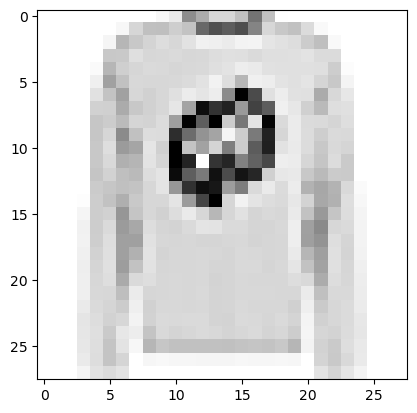

In [5]:
plt.imshow(x_train[123], cmap='Greys')

In [6]:
len(x_train[0][0])

28

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)

In [10]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
batch_size = 350
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
155/155 [==============================] - 14s 88ms/step - loss: 0.8742 - accuracy: 0.6853 - val_loss: 0.5256 - val_accuracy: 0.8048
Epoch 2/20
155/155 [==============================] - 14s 93ms/step - loss: 0.5222 - accuracy: 0.8089 - val_loss: 0.4405 - val_accuracy: 0.8418
Epoch 3/20
155/155 [==============================] - 15s 94ms/step - loss: 0.4609 - accuracy: 0.8326 - val_loss: 0.3987 - val_accuracy: 0.8570
Epoch 4/20
155/155 [==============================] - 15s 94ms/step - loss: 0.4248 - accuracy: 0.8476 - val_loss: 0.3747 - val_accuracy: 0.8635
Epoch 5/20
155/155 [==============================] - 15s 95ms/step - loss: 0.3999 - accuracy: 0.8584 - val_loss: 0.3665 - val_accuracy: 0.8672
Epoch 6/20
155/155 [==============================] - 15s 96ms/step - loss: 0.3799 - accuracy: 0.8646 - val_loss: 0.3659 - val_accuracy: 0.8653
Epoch 7/20
155/155 [==============================] - 15s 96ms/step - loss: 0.3655 - accuracy: 0.8694 - val_loss: 0.3318 - val_accuracy:

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2807295024394989
Test accuracy: 0.8978000283241272


In [16]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Train loss: 0.23921702802181244
Train accuracy: 0.9137833118438721


In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import MultiLabelBinarizer

In [33]:
# Convertir las etiquetas multilabel a un formato binario
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

C:\Users\Santi\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) [0.00010001007, 0.00010003045, 0.00010006133, 0.00010006289, 0.000100079254, 0.000100150624, 0.00010015358, 0.000100154124, 0.00010016342, 0.00010017081, 0.000100182966, 0.00010020782, 0.0001002353, 0.00010024741, 0.00010025063, 0.000100272606, 0.00010028652, 0.00010029684, 0.000100302575, 0.0001003053, 0.00010033311, 0.00010039228, 0.000100429286, 0.00010043312, 0.000100442216, 0.000100487334, 0.00010050794, 0.00010051033, 0.00010051565, 0.00010052632, 0.00010057476, 0.00010059141, 0.00010059877, 0.00010060337, 0.00010060459, 0.00010060672, 0.00010061017, 0.00010063299, 0.00010063562, 0.00010064923, 0.00010070971, 0.00010071164, 0.00010074538, 0.00010075063, 0.000100758996, 0.00010078227, 0.0001007951, 0.000100805875, 0.00010086602, 0.00010090058, 0.000100941514, 0.00010095319, 0.00010095421, 0.00010098955, 0.00010102023, 0.00010102483, 0.000101052094, 0.00

In [34]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)


ValueError: multilabel-indicator is not supported

In [23]:
# Visualiza la matriz de confusion
plt.imshow(conf_matrix, cmap='Oranges')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.show()

NameError: name 'conf_matrix' is not defined

In [24]:
# Imprime las métricas
print('Precisión:', precision)
print('Sensibilidad:', recall)
print('F1-score:', f1)

NameError: name 'precision' is not defined